The following model performed 1.69 on RMSLE metric

KNeighborsRegressor(algorithm='ball_tree', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='distance')

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

train = pd.read_csv('data/train.csv', index_col=0)

X = train.drop('target', axis=1)
y = train.target

### Scaler

from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
X = minmax.fit_transform(X)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

def rmsle_metric(y_pred,y_test) : 
    assert len(y_test) == len(y_pred)
    return np.sqrt(np.mean((np.log(1+y_pred) - np.log(1+y_test))**2))

In [2]:
from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, mutual_info_regression


pipe = Pipeline([
    ('reduce_dim', PCA()),
    ('regressor', KNeighborsRegressor(
        algorithm='ball_tree', 
        leaf_size=30, 
        metric='minkowski', 
        metric_params=None, 
        n_neighbors=5, p=2, 
        weights='distance'))
])

N_FEATURES_OPTIONS = [50, 200, 800]

param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7), NMF()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
    },
    {
        'reduce_dim': [SelectKBest(mutual_info_regression)],
        'reduce_dim__k': N_FEATURES_OPTIONS,
    },
]
reducer_labels = ['PCA', 'NMF', 'KBest']

grid = GridSearchCV(pipe, cv=3, n_jobs=1, param_grid=param_grid)
grid.fit(X_train, y_train)

mean_scores = np.array(grid.cv_results_['mean_test_score'])
# scores are in the order of param_grid iteration, which is alphabetical
mean_scores = mean_scores.reshape(len(C_OPTIONS), -1, len(N_FEATURES_OPTIONS))
# select score for best C
mean_scores = mean_scores.max(axis=0)
bar_offsets = (np.arange(len(N_FEATURES_OPTIONS)) *
               (len(reducer_labels) + 1) + .5)

plt.figure()
COLORS = 'bgrcmyk'
for i, (label, reducer_scores) in enumerate(zip(reducer_labels, mean_scores)):
    plt.bar(bar_offsets + i, reducer_scores, label=label, color=COLORS[i])

plt.title("Comparing feature reduction techniques")
plt.xlabel('Reduced number of features')
plt.xticks(bar_offsets + len(reducer_labels) / 2, N_FEATURES_OPTIONS)
plt.ylabel('Digit classification accuracy')
plt.ylim((0, 1))
plt.legend(loc='upper left')

NameError: name 'C_OPTIONS' is not defined

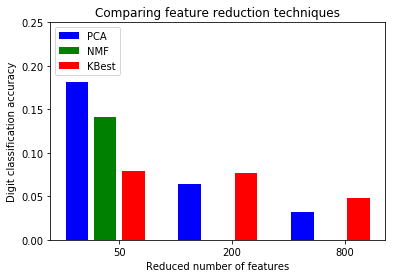

In [7]:
C_OPTIONS = [0]

mean_scores = mean_scores.reshape(len(C_OPTIONS), -1, len(N_FEATURES_OPTIONS))
# select score for best C
mean_scores = mean_scores.max(axis=0)
bar_offsets = (np.arange(len(N_FEATURES_OPTIONS)) *
               (len(reducer_labels) + 1) + .5)

plt.figure()
COLORS = 'bgrcmyk'
for i, (label, reducer_scores) in enumerate(zip(reducer_labels, mean_scores)):
    plt.bar(bar_offsets + i, reducer_scores, label=label, color=COLORS[i])

plt.title("Comparing feature reduction techniques")
plt.xlabel('Reduced number of features')
plt.xticks(bar_offsets + len(reducer_labels) / 2, N_FEATURES_OPTIONS)
plt.ylabel('Digit classification accuracy')
plt.ylim((0, 0.25))
plt.legend(loc='upper left')

In [11]:
grid.best_estimator_

Pipeline(memory=None,
     steps=[('reduce_dim', PCA(copy=True, iterated_power=7, n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('regressor', KNeighborsRegressor(algorithm='ball_tree', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='distance'))])

In [14]:
y_pred = grid.predict(X_test)
print(rmsle_metric(y_pred, y_test))

1.6276326056308212


In [15]:
from sklearn.externals import joblib

joblib.dump(grid.best_estimator_, 'PCA_KNN_1_627.pkl')

['PCA_KNN_1_627.pkl']

### Preprocess target

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

train = pd.read_csv('data/train.csv', index_col=0)

X = train.drop('target', axis=1)
y = train.target

### Scaler

from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
X = minmax.fit_transform(X)
y = np.log1p(y)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

def rmsle_metric(y_test, y_pred) : 
    assert len(y_test) == len(y_pred)
    y_test = np.exp(y_test)-1
    y_pred = np.exp(y_pred)-1
    rmsle = np.sqrt(np.mean((np.log(1+y_pred) - np.log(1+y_test))**2))
    return rmsle

In [2]:
from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, mutual_info_regression


pipe = Pipeline([
    ('reduce_dim', PCA()),
    ('regressor', KNeighborsRegressor(
        algorithm='ball_tree', 
        leaf_size=30, 
        metric='minkowski', 
        metric_params=None, 
        n_neighbors=5, p=2, 
        weights='distance'))
])

N_FEATURES_OPTIONS = [50, 200, 500]
C_OPTIONS = [0]

param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7), NMF()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
    },
    {
        'reduce_dim': [SelectKBest(mutual_info_regression)],
        'reduce_dim__k': N_FEATURES_OPTIONS,
    },
]
reducer_labels = ['PCA', 'NMF', 'KBest']

grid = GridSearchCV(pipe, cv=3, n_jobs=3, param_grid=param_grid)
grid.fit(X_train, y_train)

mean_scores = np.array(grid.cv_results_['mean_test_score'])
# scores are in the order of param_grid iteration, which is alphabetical
mean_scores = mean_scores.reshape(len(C_OPTIONS), -1, len(N_FEATURES_OPTIONS))
# select score for best C
mean_scores = mean_scores.max(axis=0)
bar_offsets = (np.arange(len(N_FEATURES_OPTIONS)) *
               (len(reducer_labels) + 1) + .5)


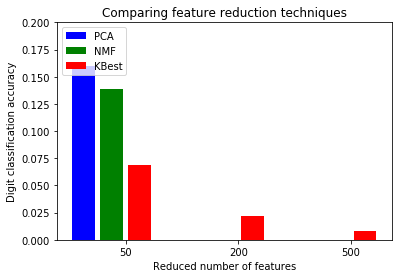

In [4]:
plt.figure()
COLORS = 'bgrcmyk'
for i, (label, reducer_scores) in enumerate(zip(reducer_labels, mean_scores)):
    plt.bar(bar_offsets + i, reducer_scores, label=label, color=COLORS[i])

plt.title("Comparing feature reduction techniques")
plt.xlabel('Reduced number of features')
plt.xticks(bar_offsets + len(reducer_labels) / 2, N_FEATURES_OPTIONS)
plt.ylabel('Digit classification accuracy')
plt.ylim((0, .2))
plt.legend(loc='upper left')

In [5]:
y_pred = grid.predict(X_test)
print(rmsle_metric(y_test, y_pred))

1.5943026560367866


In [7]:
grid.best_estimator_

Pipeline(memory=None,
     steps=[('reduce_dim', PCA(copy=True, iterated_power=7, n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('regressor', KNeighborsRegressor(algorithm='ball_tree', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='distance'))])

In [8]:
from sklearn.externals import joblib

joblib.dump(grid.best_estimator_, 'PCA_KNN_1_594.pkl')

['PCA_KNN_1_594.pkl']